<h2 align = "center"> Association Rule </h2>

### Some Key Terms

* Apriori rule:
   If an itemset is frequent, then any of its subset must be frequent. This is known as the A-Priori principle, the foundation of the A-Priori algorithm. The direct application of the A-Priori principle is to prune the huge number of frequent itemsets. Many of the potential combinations of items are rarely, if ever, found in practice. 
   1) Identifying all the itemsets that meet a minimum support threshold
   2) Creating rules from these itemsets using those meeting a minimum confidence threshold

* Support: How frequently it occurs in the data. count(X)/N
* Confidence: a measurement of its predictive power or accuracy. confidence(X-->Y) = support(X, Y)/support(X): the presense of item or itemset X results in the presense of item or itemset Y. 
* Lift: support(X,Y)/support(X)*support(Y): The association X,Y occurs m times more than we would expect if the two items were independent 


[link](https://cran.r-project.org/web/packages/arulesViz/vignettes/arulesViz.pdf)

<h4><font color = "red"> Association rule is mostly for exploratory analysis </h4>

  Strenghts     | Weakness
  ------------- | -------------
  1) Capable of working with large amounts of transactional data <br/> 2) rules are easy to understand <br/>  3) Useful for data mining and discovering unexpected knowledge in the databases <br/> 4) The information could be used for display of actual items or the associated coupons to each other or manage the mailing list | 1) Not very helpful for small datasets <br />  2) require effort to separate the true insight from common sense <br/> 3) Easy to draw spurious conclusions from random patterns

* Support means the frequency in which this rule appears in the dataset
* confidence means the probability of the appearance of Y  when X  is present.
* Lift is confidence divided by the support of Y. Compared to the users who bought Y, how buying a X will lend to more Y

In [1]:
library(arules)

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



#### Groceries Data 

In [2]:
data("Groceries")

In [3]:
summary(Groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

In [4]:
groc.rules = apriori(Groceries, parameter = list(supp = 0.01, conf = 0.3, target = "rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.3    0.1    1 none FALSE            TRUE    0.01      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [125 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


* Check the number of items going to the rule: To see whether it is too low or high and adjust the support or confidence accordingly
* Check the number of rules generated

In [5]:
inspect(subset(groc.rules, lift >3))

    lhs                                  rhs                support   
32  {beef}                            => {root vegetables}  0.01738688
90  {citrus fruit,root vegetables}    => {other vegetables} 0.01037112
91  {citrus fruit,other vegetables}   => {root vegetables}  0.01037112
100 {tropical fruit,root vegetables}  => {other vegetables} 0.01230300
101 {tropical fruit,other vegetables} => {root vegetables}  0.01230300
    confidence lift    
32  0.3313953  3.040367
90  0.5862069  3.029608
91  0.3591549  3.295045
100 0.5845411  3.020999
101 0.3427762  3.144780


* The information could be used for display of actual items or the associated coupons to each other

#### Supermarket Data 

In [6]:
retail.raw = readLines("http://fimi.ua.ac.be/data/retail.dat")

In [7]:
head(retail.raw)

[1] "0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 "
[2] "30 31 32 "                                                                       
[3] "33 34 35 "                                                                       
[4] "36 37 38 39 40 41 42 43 44 45 46 "                                               
[5] "38 39 47 48 "                                                                    
[6] "38 39 48 49 50 51 52 53 54 55 56 57 58 "

In [8]:
retail.list = strsplit(retail.raw, " ")

In [9]:
names(retail.list) = paste("Trans", 1:length(retail.list), sep ="")

In [10]:
str(retail.list)

List of 88162
 $ Trans1    : chr [1:30] "0" "1" "2" "3" ...
 $ Trans2    : chr [1:3] "30" "31" "32"
 $ Trans3    : chr [1:3] "33" "34" "35"
 $ Trans4    : chr [1:11] "36" "37" "38" "39" ...
 $ Trans5    : chr [1:4] "38" "39" "47" "48"
 $ Trans6    : chr [1:13] "38" "39" "48" "49" ...
 $ Trans7    : chr [1:6] "32" "41" "59" "60" ...
 $ Trans8    : chr [1:3] "3" "39" "48"
 $ Trans9    : chr [1:6] "63" "64" "65" "66" ...
 $ Trans10   : chr [1:2] "32" "69"
 $ Trans11   : chr [1:4] "48" "70" "71" "72"
 $ Trans12   : chr [1:8] "39" "73" "74" "75" ...
 $ Trans13   : chr [1:8] "36" "38" "39" "41" ...
 $ Trans14   : chr [1:3] "82" "83" "84"
 $ Trans15   : chr [1:5] "41" "85" "86" "87" ...
 $ Trans16   : chr [1:15] "39" "48" "89" "90" ...
 $ Trans17   : chr [1:5] "36" "38" "39" "48" ...
 $ Trans18   : chr [1:9] "39" "41" "102" "103" ...
 $ Trans19   : chr [1:5] "38" "39" "41" "109" ...
 $ Trans20   : chr [1:9] "39" "111" "112" "113" ...
 $ Trans21   : chr [1:15] "119" "120" "121" "122" ...
 $ Tr

In [11]:
library(car)


Attaching package: 'car'

The following object is masked from 'package:arules':

    recode



In [12]:
some(retail.list)

$Trans6470
[1] "32"   "39"   "48"   "1424" "5248"

$Trans7576
[1] "39"

$Trans23049
[1] "123"   "291"   "788"   "10388"

$Trans25204
[1] "41"    "123"   "2281"  "2861"  "4419"  "9029"  "10498" "11224" "11463"

$Trans44840
 [1] "39"    "48"    "147"   "261"   "589"   "2080"  "2276"  "2879"  "4055" 
[10] "4822"  "12925" "12981" "12984" "13008"

$Trans51474
[1] "38"    "39"    "1188"  "1594"  "1595"  "14386"

$Trans51633
 [1] "39"    "48"    "75"    "150"   "176"   "185"   "567"   "659"   "697"  
[10] "1104"  "1804"  "2434"  "2596"  "3242"  "6716"  "12925"

$Trans69528
 [1] "22"    "32"    "39"    "48"    "49"    "123"   "421"   "662"   "715"  
[10] "828"   "916"   "1282"  "1999"  "2300"  "2424"  "2619"  "2664"  "2671" 
[19] "2702"  "3000"  "4126"  "4376"  "5203"  "5388"  "5846"  "5915"  "8680" 
[28] "10653" "10682" "10943" "13189" "14523" "15385"

$Trans83206
[1] "39"    "664"   "1791"  "2490"  "10128" "11317" "12925"

$Trans87572
 [1] "38"    "39"    "41"    "48"    "110"   "286"   "871"   "2182"  "2572" 
[10] "5974"  "11310" "12925" "13300" "13443" "16430" "16431"

In [13]:
retail.trans = as(retail.list, "transactions")

In [14]:
retail.rules = apriori(retail.trans, parameter = list(supp = 0.001, conf = 0.4))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.4    0.1    1 none FALSE            TRUE   0.001      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 88 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[16470 item(s), 88162 transaction(s)] done [0.12s].
sorting and recoding items ... [2117 item(s)] done [0.01s].
creating transaction tree ... done [0.05s].
checking subsets of size 1 2 3 4 5 6 done [0.12s].
writing ... [5944 rule(s)] done [0.01s].
creating S4 object  ... done [0.01s].


In [16]:
library(arulesViz)

Loading required package: grid


Interactive mode.
Select a region with two clicks!


ERROR: Error in convertUnit(x, unitTo, "x", "location", "x", "location", valueOnly = valueOnly): 'x' argument must be a unit object


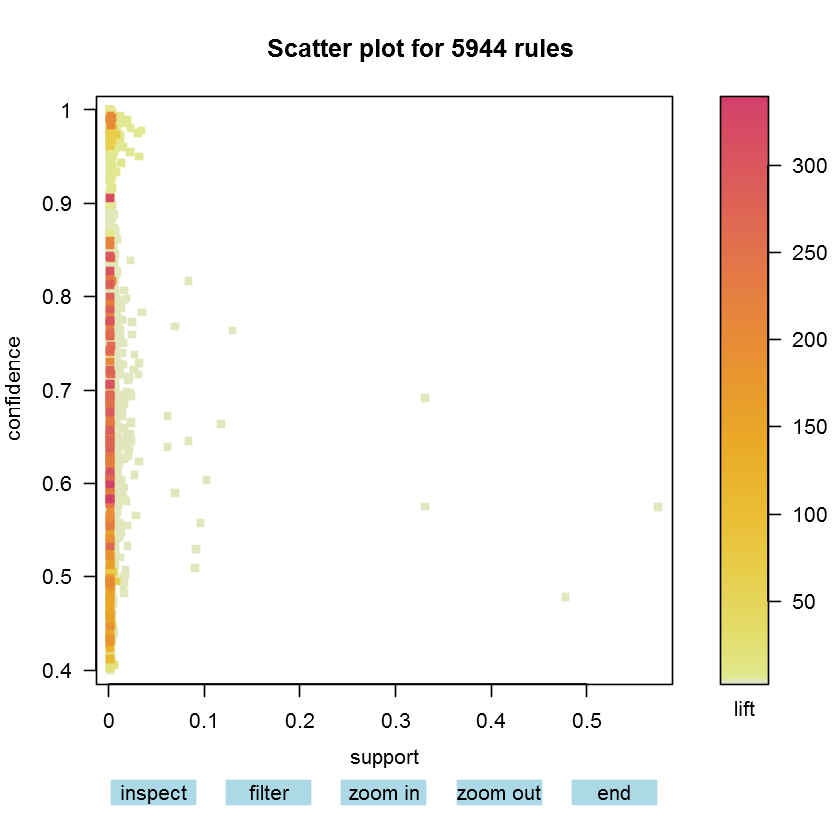

In [18]:
plot(retail.rules, interactive = TRUE)

* Interactively explore different rules 

In [19]:
retail.hi = head(sort(retail.rules, by = "lift"), 50)

In [20]:
inspect(retail.hi)

     lhs                 rhs    support     confidence lift    
99   {696}            => {699}  0.001032191 0.5833333  338.3410
98   {699}            => {696}  0.001032191 0.5986842  338.3410
5097 {1818,3311,795}  => {1819} 0.001088905 0.9056604  318.1069
193  {3402}           => {3535} 0.001417844 0.7062147  305.2024
194  {3535}           => {3402} 0.001417844 0.6127451  305.2024
5099 {1818,1819,795}  => {3311} 0.001088905 0.8275862  302.7455
5100 {1819,3311,795}  => {1818} 0.001088905 0.7741935  302.0108
2856 {3311,795}       => {1819} 0.001406502 0.8435374  296.2866
5098 {1818,1819,3311} => {795}  0.001088905 0.8421053  295.7836
2481 {3537,39}        => {3535} 0.001043533 0.6764706  292.3480
2482 {3535,39}        => {3537} 0.001043533 0.6571429  288.2340
2833 {1818,1819}      => {3311} 0.001293074 0.7862069  287.6082
2832 {1818,3311}      => {1819} 0.001293074 0.8142857  286.0122
2831 {3311,795}       => {1818} 0.001202332 0.7210884  281.2947
2839 {1818,1819}      => {795}  0.001315

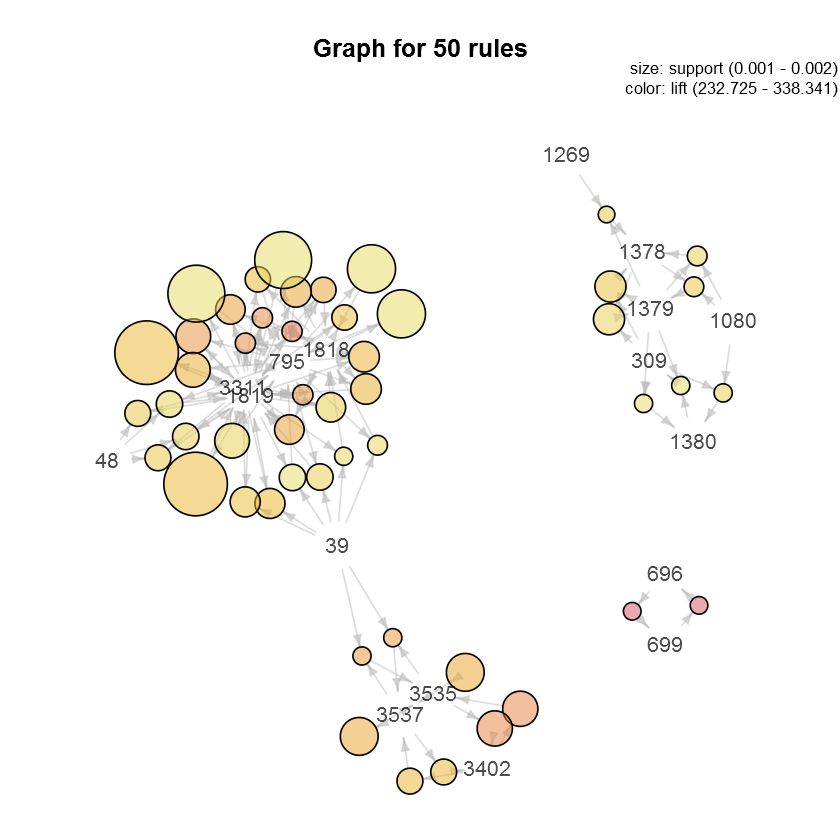

In [21]:
plot(retail.hi, method = "graph", control = list(type = "items"))

* inbound error comes from the left side of the rule and outbound points to the right side of the rule 
* Size represents the support and the shade represents the lift (darker means higher lift) 

#### Find the profit margin for each rule

In [22]:
retail.itemnames = sort(unique(unlist(as(retail.trans, "list"))))

In [23]:
head(retail.itemnames)

[1] "0"     "1"     "10"    "100"   "1000"  "10000"

In [24]:
set.seed(100)

In [25]:
retail.margin = data.frame(margin = rnorm(length(retail.itemnames), mean = 0.3, sd =0.3))

In [26]:
rownames(retail.margin )= retail.itemnames

In [27]:
basket.items = as(retail.trans[3], "list")[[1]]

In [28]:
retail.margin[basket.items,]

[1] 0.4339296 0.3625898 0.5325276

<font color = "red"> Not in Use </font>

In [4]:
data = read.csv("E:/Personal/InterviewQuestion/Rscripts/Learning Data Mining with R/2103OS_Codes/chapter2/data/itemsets001.csv")

In [1]:
IsEmpty <- function(ck,k){
    return(ifelse(nrow(ck[[k]])>0,FALSE,TRUE))
}

GetDatasetSize <- function(data){
     return( nrow(data) )
}

InitCandidateSet <- function(data,base_items){
      list(cbind(diag(length(base_items)),apply(data,2,sum)))
}

FindFrequentItemset <- function(fk,base_items,k,MIN_SUP){
    data <- fk[[k]]
    return(data[data[,dim(data)[2]]>MIN_SUP,])
}

In [6]:
tbl <- as.matrix(data)
colnames(tbl) <- NULL
itemsets <- tbl
items <- c(1,2,3,4,5)
min_sup <- 0.22*nrow(itemsets)

In [ ]:
function(i){
    subset(rowSums())
}

In [ ]:
Apriori <- function(data,base_items,MIN_SUP,parameter=NULL){
    ntran = nrow(data)
    c = list() #containing all the items with different numbers
    # When only look at the first item
    support1 = colSums(data)
    baseData = subset(data, support1 >=MIN_SUP)
    c[[1]] = baseData
    while i <= max(rowSums(data)) & 
        i

In [8]:
Apriori <- function(data,base_items,MIN_SUP,parameter=NULL){
    f <- InitCandidateSet(data,base_items)
    c <- list()
   c[[1]] <- FindFrequentItemset(f,base_items,1,MIN_SUP)
    k <- 2
   len4data <- GetDatasetSize(data)
   while( !IsEmpty(c,k-1) ){
        f[[k]] <- AprioriGen(c,k-1)
        if(length(f)==k){
            f[[k]] <- IncreaseSupportCount(f[[k]],data)
             c[[k]] <- FindFrequentItemset(f,base_items,k,MIN_SUP)		
        }else{break}
         k <- k+1
        }
        c
}

In [ ]:
Apriori <- function(data,base_items,MIN_SUP,parameter=NULL){
    
}

In [9]:
data = itemsets
base_items = items
MIN_SUP = min_sup

In [10]:
 f <- InitCandidateSet(data,base_items)

In [13]:
FindFrequentItemset(f,base_items,1,MIN_SUP)

1,0,0,0,0,5
0,1,0,0,0,6
0,0,1,0,0,6
0,0,0,1,0,2


In [14]:
rowSums(data)

[1] 2 2 3 2 2 2 4 3

In [ ]:
frequent_itemsets <- Apriori(itemsets,items,min_sup)

In [ ]:
AprioriGen <- function(c,k){
	ck <- c[[k]][,-ncol(c[[k]])]
	f <- NULL
	len <- nrow(ck)
	for(idx in seq(nrow(ck))){
		jdx <- idx+1
		while(idx<jdx && jdx<=len){
			a <- ck[idx,]
			b <- ck[jdx,]
			if( k==1 || identical(a[1:(k-1)],b[1:(k-1)]) ){
					ab <- ifelse(a+b,1,0)
					if( !NeedPrune(ck,ab,k) ){
						f <- rbind(f,ab)
					}else{
						#print("Pruned")
					}
			}
			jdx <- jdx + 1
		}
	}

	if(length(f)){
		 f <- cbind(f,rep(0,dim(f)[1]))
		 rownames(f) <- NULL
	}
	return(f)
}

NeedPrune <- function(ck,ab,k){
	ck <- rbind(ck,ab)
	len <- dim(ck)[1]
	for(idx in which(ab>0)){
		temp <- ab
		temp[idx] <- 0
		for(idx in seq(len)){
			if(identical(temp,ck[idx,]))break
		}
		if(idx==len)return(TRUE)
	}
	return(FALSE)
}

IncreaseSupportCount <- function(fk,data){
	w4f <- ncol(fk)
	len4f <- nrow(fk)
	len4d <- nrow(data)
	for(idx in seq(len4d)){
		for(jdx in seq(len4f)){
			if(identical(fk[jdx,-w4f],fk[jdx,-w4f]*data[idx,])){
				fk[jdx,w4f] <- fk[jdx,w4f] + 1
			}
		}
	}
	return(fk)
}


frequent_itemsets <- Apriori(itemsets,items,min_sup)